### Depression Classification Modelling

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Read cleaned healthy minds study dataset
hms = pd.read_csv("hms.csv")

#### Recode gender category to be binary

In [19]:
hms['gender_birth'] = hms['gender_birth'].apply(lambda x: 1 if x == 2 else 0)

#### Scale likert scale variables

Also flip some ordinal variables so "No/agree" is essentially 0 and "yes/agree" is 1 to be consistent

In [20]:
hms['financial_stress'] = hms['financial_stress'].apply(lambda x: 5 if x == 1 else (4 if x == 2 else (3 if x == 3 else (2 if x == 4 else 1))))
hms['perceived_help_need'] = hms['perceived_help_need'].apply(lambda x: 5 if x == 1 else (4 if x == 2 else (3 if x == 3 else (2 if x == 4 else 1))))
hms['know_where_help'] = hms['know_where_help'].apply(lambda x: 5 if x == 1 else (4 if x == 2 else (3 if x == 3 else (2 if x == 4 else 1))))

In [21]:
hms.head()

,student_age,gender_birth,exercise_hours_weekly,seek_help_if_need,perceived_help_need,know_where_help,num_of_support_areas,diagnosed_mental_illness,therapy_past12_months,gpa,...,stem,health_and_medicine,business,public_and_social_services,education,undecided,personal_stigma_score,perceived_stigma_score,self_stigma_score,not_white
0,18.0,0,5,3,5,3,3,1,1,3.5,...,0,0,1,0,0,0,12,13,4,0
1,22.0,1,4,2,5,1,0,0,0,2.5,...,0,0,1,0,0,0,12,10,6,0
2,19.0,1,1,3,4,4,4,0,0,4.0,...,0,0,0,0,0,0,13,12,6,0
3,18.0,1,3,1,1,5,0,0,0,3.0,...,1,0,0,0,0,0,7,7,9,0
4,20.0,0,1,3,4,4,3,1,1,2.5,...,0,0,0,0,0,0,16,8,3,0


In [22]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns you want to normalize
ordinal_columns = ['seek_help_if_need', 'perceived_help_need', 'know_where_help', 'financial_stress', 'exercise_hours_weekly']

# Apply MinMaxScaler to these columns
scaler = MinMaxScaler()
hms[ordinal_columns] = scaler.fit_transform(hms[ordinal_columns])


In [23]:
hms.head()

,student_age,gender_birth,exercise_hours_weekly,seek_help_if_need,perceived_help_need,know_where_help,num_of_support_areas,diagnosed_mental_illness,therapy_past12_months,gpa,...,stem,health_and_medicine,business,public_and_social_services,education,undecided,personal_stigma_score,perceived_stigma_score,self_stigma_score,not_white
0,18.0,0,1.00,1.000000,1.00,0.50,3,1,1,3.5,...,0,0,1,0,0,0,12,13,4,0
1,22.0,1,0.75,0.666667,1.00,0.00,0,0,0,2.5,...,0,0,1,0,0,0,12,10,6,0
2,19.0,1,0.00,1.000000,0.75,0.75,4,0,0,4.0,...,0,0,0,0,0,0,13,12,6,0
3,18.0,1,0.50,0.333333,0.00,1.00,0,0,0,3.0,...,1,0,0,0,0,0,7,7,9,0
4,20.0,0,0.00,1.000000,0.75,0.75,3,1,1,2.5,...,0,0,0,0,0,0,16,8,3,0


### Using PHQ-9 standardized guidelines to determine high and low risk of depression 
#### A score of 10 is considered needing intervention

Score Range  |  Severity  |  Clinical Interpretation

0–4        |     Minimal	|   Normal / No intervention usually needed

5–9	       |       Mild	  |   Watchful waiting; may not need treatment

10–14	    |     Moderate	 |  Possible clinical depression; monitor/assist

15–19       |    Moderately severe  |	Likely clinical depression; active treatment

20–27      |     Severe	    |   Severe depression; immediate treatment


In [24]:
hms['depression_risk'] = hms['depression_score'].apply(lambda x: 1 if x >= 10 else 0)


In [25]:
hms.head()

,student_age,gender_birth,exercise_hours_weekly,seek_help_if_need,perceived_help_need,know_where_help,num_of_support_areas,diagnosed_mental_illness,therapy_past12_months,gpa,...,health_and_medicine,business,public_and_social_services,education,undecided,personal_stigma_score,perceived_stigma_score,self_stigma_score,not_white,depression_risk
0,18.0,0,1.00,1.000000,1.00,0.50,3,1,1,3.5,...,0,1,0,0,0,12,13,4,0,1
1,22.0,1,0.75,0.666667,1.00,0.00,0,0,0,2.5,...,0,1,0,0,0,12,10,6,0,1
2,19.0,1,0.00,1.000000,0.75,0.75,4,0,0,4.0,...,0,0,0,0,0,13,12,6,0,1
3,18.0,1,0.50,0.333333,0.00,1.00,0,0,0,3.0,...,0,0,0,0,0,7,7,9,0,0
4,20.0,0,0.00,1.000000,0.75,0.75,3,1,1,2.5,...,0,0,0,0,0,16,8,3,0,1


In [26]:
hms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7838 entries, 0 to 7837
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   student_age                 7838 non-null   float64
 1   gender_birth                7838 non-null   int64  
 2   exercise_hours_weekly       7838 non-null   float64
 3   seek_help_if_need           7838 non-null   float64
 4   perceived_help_need         7838 non-null   float64
 5   know_where_help             7838 non-null   float64
 6   num_of_support_areas        7838 non-null   int64  
 7   diagnosed_mental_illness    7838 non-null   int64  
 8   therapy_past12_months       7838 non-null   int64  
 9   gpa                         7838 non-null   float64
 10  financial_stress            7838 non-null   float64
 11  year_in_school              7838 non-null   int64  
 12  suicide_idea                7838 non-null   int64  
 13  suicide_plan                7838 

In [27]:
hms['depression_risk'].value_counts()

depression_risk
0    4649
1    3189
Name: count, dtype: int64

### Start machine learning process 
#### Keeping in mind the slight imbalance in the target variable

In [28]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Features and target
X = hms.drop(columns=['depression_risk','depression_score','mental_wellness_score','perceived_help_need', 'anxiety_score', 'suicide_idea','suicide_plan','suicide_attempt'])
y = hms['depression_risk']

# Split BEFORE oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply Random Oversampling to training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

y_train_resampled.value_counts()

depression_risk
1    3719
0    3719
Name: count, dtype: int64

### Scale Numerical columns

#### Keep copies of the split data

In [29]:
numerical_columns = ['student_age', 'gpa', 'year_in_school', 'lonely_score', 
                    'eating_disorder_score', 'personal_stigma_score', 'perceived_stigma_score', 'self_stigma_score']

# Min-Max scaling of numerical columns
scaler = MinMaxScaler()
X_train_scaled = X_train_resampled.copy()  # Copy to preserve original data
X_test_scaled = X_test.copy()

# Scale only the numerical columns
X_train_scaled[numerical_columns] = scaler.fit_transform(X_train_scaled[numerical_columns])
X_test_scaled[numerical_columns] = scaler.transform(X_test_scaled[numerical_columns])

In [30]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train_resampled)

LogisticRegression(max_iter=1000)

In [31]:
X.columns

Index(['student_age', 'gender_birth', 'exercise_hours_weekly',
       'seek_help_if_need', 'know_where_help', 'num_of_support_areas',
       'diagnosed_mental_illness', 'therapy_past12_months', 'gpa',
       'financial_stress', 'year_in_school', 'lonely_score',
       'eating_disorder_score', 'student_athlete', 'arts_and_humanities',
       'social_sciences', 'stem', 'health_and_medicine', 'business',
       'public_and_social_services', 'education', 'undecided',
       'personal_stigma_score', 'perceived_stigma_score', 'self_stigma_score',
       'not_white'],
      dtype='object')

In [32]:
import statsmodels.api as sm
model_log = sm.Logit(y, sm.add_constant(X))  # X is your features matrix, y is your target
res = model_log.fit()
print(res.summary())


Optimization terminated successfully.
         Current function value: 0.465308
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        depression_risk   No. Observations:                 7838
Model:                          Logit   Df Residuals:                     7812
Method:                           MLE   Df Model:                           25
Date:                Fri, 25 Apr 2025   Pseudo R-squ.:                  0.3114
Time:                        13:40:09   Log-Likelihood:                -3647.1
converged:                       True   LL-Null:                       -5296.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -1.9101        nan        nan        nan      

In [33]:
log_model.coef_

array([[-0.99291234, -0.19114465, -0.55612373, -0.47913056, -0.49001325,
         0.05699996,  0.80354712,  0.45006197, -2.09640677,  1.62445674,
         0.157733  ,  2.77021907,  1.7893864 ,  0.22713498,  0.11594527,
        -0.05296574,  0.09655727, -0.24404365, -0.15498298, -0.08875255,
        -0.07177102, -0.07966037, -0.03217828, -0.61760991,  0.64011637,
        -0.11716446]])

In [34]:
# Pull the model coefficients
coefs = log_model.coef_[0]  # just the array

# Create a DataFrame
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': coefs
})

# Add absolute value and direction
coef_df["Abs_Coefficient"] = coef_df["Coefficient"].abs()
coef_df["Effect"] = coef_df["Coefficient"].apply(
    lambda x: "Risk Factor" if x > 0 else "Protective Factor"
)

# Variable type mapping
variable_types = {
    "student_age": "Demographic",
    "gender_birth": "Demographic",
    "not_white": "Demographic",
    "student_athlete": "Demographic",
    "gpa": "Academic",
    "year_in_school": "Academic",
    "arts_and_humanities": "Academic",
    "social_sciences": "Academic",
    "stem": "Academic",
    "health_and_medicine": "Academic",
    "business": "Academic",
    "public_and_social_services": "Academic",
    "education": "Academic",
    "undecided": "Academic",
    "exercise_hours_weekly": "Behavioral",
    "seek_help_if_need": "Behavioral",
    "know_where_help": "Behavioral",
    "num_of_support_areas": "Behavioral",
    "lonely_score": "Behavioral",
    "financial_stress": "Socioeconomic",
    "diagnosed_mental_illness": "Clinical",
    "therapy_past12_months": "Clinical",
    "eating_disorder_score": "Clinical",
    "mental_wellness_score": "Clinical",
    "personal_stigma_score": "Behavioral",
    "perceived_stigma_score": "Behavioral",
    "self_stigma_score": "Behavioral"
}

coef_df["Variable_Type"] = coef_df["Variable"].map(variable_types)

coef_df.to_csv("predictors.csv", index=False)
coef_df

,Variable,Coefficient,Abs_Coefficient,Effect,Variable_Type
0,student_age,-0.992912,0.992912,Protective Factor,Demographic
1,gender_birth,-0.191145,0.191145,Protective Factor,Demographic
2,exercise_hours_weekly,-0.556124,0.556124,Protective Factor,Behavioral
3,seek_help_if_need,-0.479131,0.479131,Protective Factor,Behavioral
4,know_where_help,-0.490013,0.490013,Protective Factor,Behavioral
5,num_of_support_areas,0.057000,0.057000,Risk Factor,Behavioral
6,diagnosed_mental_illness,0.803547,0.803547,Risk Factor,Clinical
7,therapy_past12_months,0.450062,0.450062,Risk Factor,Clinical
8,gpa,-2.096407,2.096407,Protective Factor,Academic
9,financial_stress,1.624457,1.624457,Risk Factor,Socioeconomic


### Model Performance on Classification Tasks

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = log_model.predict(X_test_scaled)

In [36]:
accuracy_score(y_test,y_pred)

0.7614795918367347

In [37]:
confusion_matrix(y_test,y_pred)

array([[705, 225],
       [149, 489]], dtype=int64)

In [38]:
# Before oversampling, check the class distribution
print("Original Training Data Distribution:")
print(y_train.value_counts())

# After oversampling, check the class distribution
print("Resampled Training Data Distribution:")
print(y_train_resampled.value_counts())


Original Training Data Distribution:
depression_risk
0    3719
1    2551
Name: count, dtype: int64
Resampled Training Data Distribution:
depression_risk
1    3719
0    3719
Name: count, dtype: int64


In [39]:
from sklearn.metrics import classification_report
log_results = classification_report(y_test, y_pred)
print(log_results)

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       930
           1       0.68      0.77      0.72       638

    accuracy                           0.76      1568
   macro avg       0.76      0.76      0.76      1568
weighted avg       0.77      0.76      0.76      1568



## Evaluating Curves and AUC

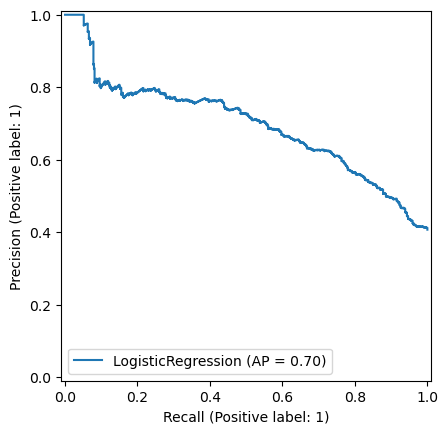

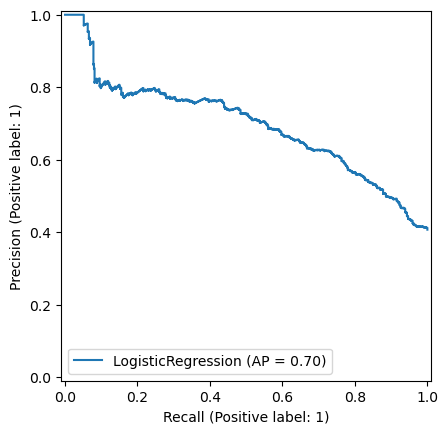

In [40]:
from sklearn.metrics import PrecisionRecallDisplay

# Get predicted probabilities for the positive class (class 1)
y_scores = log_model.predict_proba(X_test)[:, 1]

# Create a PrecisionRecallDisplay object and plot it
display = PrecisionRecallDisplay.from_estimator(log_model, X_test, y_test)
display.plot()



#### ROC curve

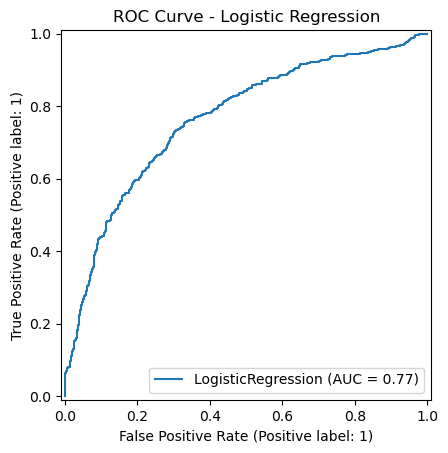

In [41]:
from sklearn.metrics import RocCurveDisplay

def plot_roc_curve(model, X_test, y_test, model_name):
    y_scores = model.predict_proba(X_test)[:, 1]
    
    # Create a ROCAUCDisplay object and plot it
    display = RocCurveDisplay.from_estimator(model, X_test, y_test)
    
    # Set the title to include the model name
    plt.title(f'ROC Curve - {model_name}')
    plt.show()

plot_roc_curve(log_model, X_test, y_test, 'Logistic Regression')



### KNN Modeling

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7838 entries, 0 to 7837
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   student_age                 7838 non-null   float64
 1   gender_birth                7838 non-null   int64  
 2   exercise_hours_weekly       7838 non-null   float64
 3   seek_help_if_need           7838 non-null   float64
 4   know_where_help             7838 non-null   float64
 5   num_of_support_areas        7838 non-null   int64  
 6   diagnosed_mental_illness    7838 non-null   int64  
 7   therapy_past12_months       7838 non-null   int64  
 8   gpa                         7838 non-null   float64
 9   financial_stress            7838 non-null   float64
 10  year_in_school              7838 non-null   int64  
 11  lonely_score                7838 non-null   int64  
 12  eating_disorder_score       7838 non-null   int64  
 13  student_athlete             7838 

### Find the best value for K

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=30)

# Train the KNN model
knn_model.fit(X_train_scaled, y_train_resampled)

# Make predictions
y_pred_knn = knn_model.predict(X_test_scaled)

test_error_rates = []
lowest_error= 1
best_k = 1
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train_resampled) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_knn)
    test_error_rates.append(test_error)
    if test_error < 1:
        lowest_error = test_error
        best_k = k

### knn results

In [44]:
lowest_error

0.29272959183673475

In [45]:
best_k

29

In [46]:
accuracy_score(y_test, y_pred_knn)

0.7072704081632653

In [47]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       930
           1       0.63      0.67      0.65       638

    accuracy                           0.71      1568
   macro avg       0.70      0.70      0.70      1568
weighted avg       0.71      0.71      0.71      1568



Text(0.5, 0, 'K Value')

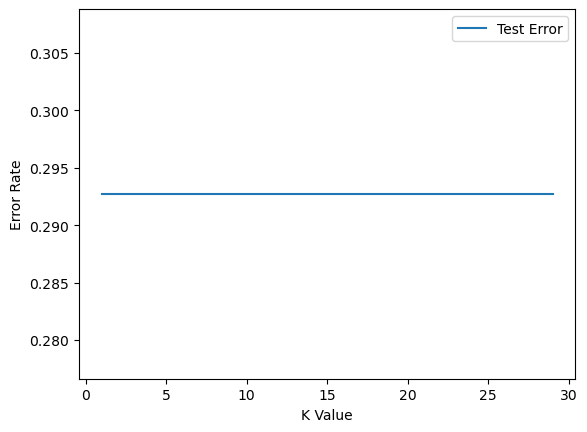

In [48]:

plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

#### Further test K

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score

# Create the MinMaxScaler and KNN classifier
scaler = MinMaxScaler()
knn_model = KNeighborsClassifier()

# Set up the pipeline
pipe = Pipeline([
    ('scaler', scaler),
    ('knn', knn_model)
])

# Define the range of k values to test
k_values = list(range(1, 30))

# Create the parameter grid for GridSearchCV
param_grid = {'knn__n_neighbors': k_values}


In [50]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Output the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)


Best parameters found:  {'knn__n_neighbors': 1}
Best cross-validation accuracy:  0.7713234230716388


In [51]:
# Make predictions with the best estimator
best_knn_model = grid_search.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)

# Evaluate the model performance
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))
knn_results = classification_report(y_test, y_pred_knn)
print(knn_results)

Accuracy:  0.6626275510204082
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       930
           1       0.59      0.56      0.57       638

    accuracy                           0.66      1568
   macro avg       0.65      0.65      0.65      1568
weighted avg       0.66      0.66      0.66      1568



### Test With SVM modelling

In [52]:
from sklearn.svm import SVC

#### Setup the model

In [73]:
# SVM Model
svm_model = SVC(probability=True)

# Set up the pipeline
pipe = Pipeline([
    ('scaler', scaler),
    ('svm', svm_model)
])

# Set up the parameter grid for SVM hyperparameters
param_grid = {
    'svm__C': [0.1, 1, 10],            # Regularization parameter
    'svm__gamma': ['scale', 'auto'],   # Kernel coefficient for RBF
    'svm__kernel': ['linear', 'rbf']   # Types of kernels to test
}


#### Find the best parameters

In [74]:
# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train_resampled)

# Output the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

# Make predictions with the best estimator
best_svm_model = SVC(probability=True)
best_svm_model = grid_search.best_estimator_
y_pred_svm = best_svm_model.predict(X_test_scaled)

Best parameters found:  {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Best cross-validation accuracy:  0.777763195001844


#### Display SVM results

In [75]:
# Evaluate the model performance
print("Accuracy: ", accuracy_score(y_test, y_pred_svm))
svm_results = classification_report(y_test, y_pred_svm)
print(svm_results)

Accuracy:  0.7608418367346939
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       930
           1       0.68      0.77      0.72       638

    accuracy                           0.76      1568
   macro avg       0.75      0.76      0.76      1568
weighted avg       0.77      0.76      0.76      1568



Logistic Regression appears to have a slight edge over SVM in predicting students at risk, with better performance in both accuracy and F1-score. Although SVM performed well, Logistic Regression seems to be the better choice, and KNN performed the worst

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train_resampled, y_train_resampled)
decision_tree_pred = model_tree.predict(X_test)

### Evaluate Decision tree performance

In [58]:
pd.DataFrame(index=X.columns,data=model_tree.feature_importances_,columns=['Feature Importance'])

,Feature Importance
student_age,0.054461
gender_birth,0.014768
exercise_hours_weekly,0.047698
seek_help_if_need,0.029675
know_where_help,0.041133
num_of_support_areas,0.048808
diagnosed_mental_illness,0.045992
therapy_past12_months,0.013201
gpa,0.046163
financial_stress,0.061638


In [59]:
print("Accuracy: ", confusion_matrix(y_test,decision_tree_pred))
print("Classification Report:\n", classification_report(y_test, decision_tree_pred))
decision_tree_result = classification_report(y_test, decision_tree_pred)

Accuracy:  [[657 273]
 [260 378]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.71      0.71       930
           1       0.58      0.59      0.59       638

    accuracy                           0.66      1568
   macro avg       0.65      0.65      0.65      1568
weighted avg       0.66      0.66      0.66      1568



## Random Forest Classification

In [60]:
from sklearn.ensemble import RandomForestClassifier

# Use 10 random trees
model_rf = RandomForestClassifier(n_estimators=10,max_features='sqrt',random_state=101)

In [61]:
model_rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(n_estimators=10, random_state=101)

In [62]:
preds_rf = model_rf.predict(X_test)

## Evaluation

In [63]:
confusion_matrix(y_test,preds_rf)

array([[759, 171],
       [247, 391]], dtype=int64)

In [64]:
test_error = []

for n in range(1,40):
    # Use n random trees
    model_rf = RandomForestClassifier(n_estimators=n,max_features='sqrt')
    model_rf.fit(X_train_resampled,y_train_resampled)
    test_preds = model_rf.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

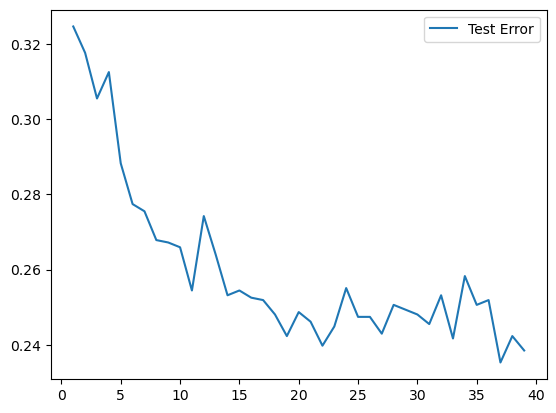

In [65]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

### Auto search for tuning parameters

In [66]:
from sklearn.model_selection import GridSearchCV

n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [67]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  # Note, oob_score only makes sense when bootstrap=True!

rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [68]:
grid.fit(X_train_resampled,y_train_resampled)

C:\Users\t-pegansallo\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\t-pegansallo\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\t-pegansallo\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\t-pegansallo\AppData\Local\anaconda3\L

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [69]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128, 'oob_score': True}

In [70]:
predictions = grid.predict(X_test)

random_forest_result = classification_report(y_test,predictions)
print(random_forest_result)

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       930
           1       0.71      0.67      0.69       638

    accuracy                           0.76      1568
   macro avg       0.75      0.74      0.75      1568
weighted avg       0.75      0.76      0.76      1568



## Best Model Selection

logistic regression result
               precision    recall  f1-score   support

           0       0.83      0.76      0.79       930
           1       0.68      0.77      0.72       638

    accuracy                           0.76      1568
   macro avg       0.76      0.76      0.76      1568
weighted avg       0.77      0.76      0.76      1568

KNN results
               precision    recall  f1-score   support

           0       0.71      0.74      0.72       930
           1       0.59      0.56      0.57       638

    accuracy                           0.66      1568
   macro avg       0.65      0.65      0.65      1568
weighted avg       0.66      0.66      0.66      1568

SVM results
               precision    recall  f1-score   support

           0       0.83      0.75      0.79       930
           1       0.68      0.77      0.72       638

    accuracy                           0.76      1568
   macro avg       0.75      0.76      0.76      1568
weighted avg       0

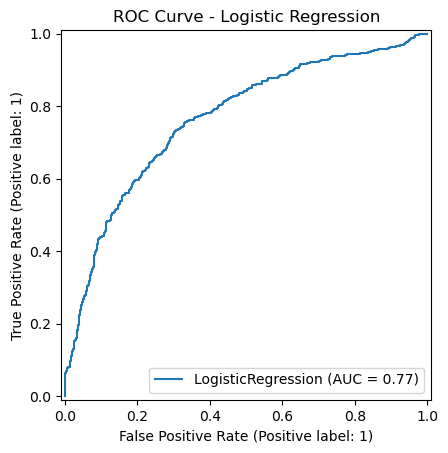

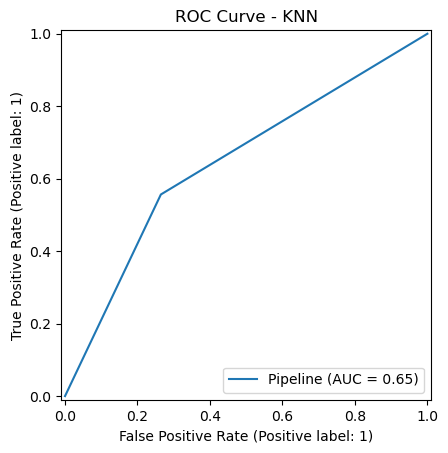

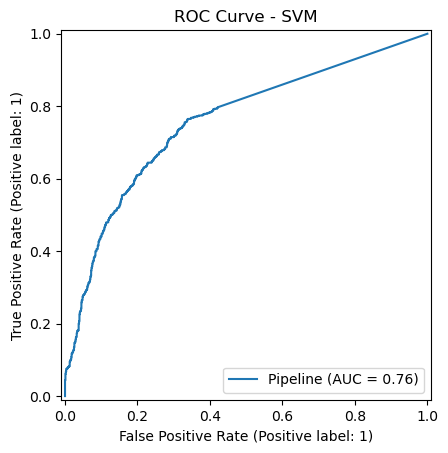

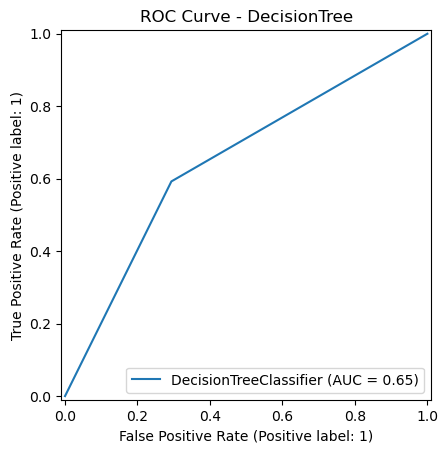

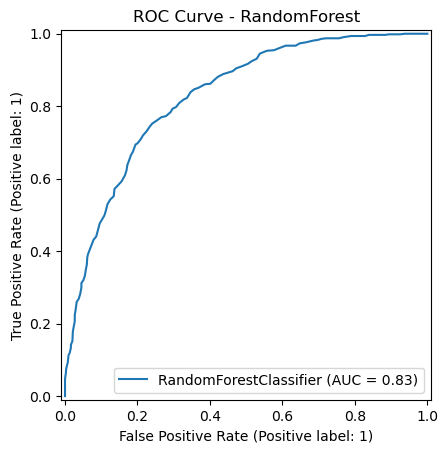

In [76]:
print('logistic regression result\n',log_results)
print('KNN results\n',knn_results)
print('SVM results\n',svm_results)
print('decision tree results\n',decision_tree_result)
print('Random forest results\n',random_forest_result)
plot_roc_curve(log_model, X_test, y_test, 'Logistic Regression')
plot_roc_curve(best_knn_model, X_test, y_test, 'KNN')
plot_roc_curve(best_svm_model, X_test, y_test, 'SVM')
plot_roc_curve(model_tree, X_test, y_test, 'DecisionTree')
plot_roc_curve(grid.best_estimator_, X_test, y_test, 'RandomForest')

I'm choosing Logistic Regression because it's tied for best recall for Class 1 with SVM, however logistic regression slightly outperforms SVM by .01 better recall for class 0. In this case, it's more important to correctly identify as many high-risk individuals as possible, even if it means a few false positives. Missing someone who is truly at risk could have serious consequences, so prioritizing recall helps ensure we catch more of the people who need support the most.



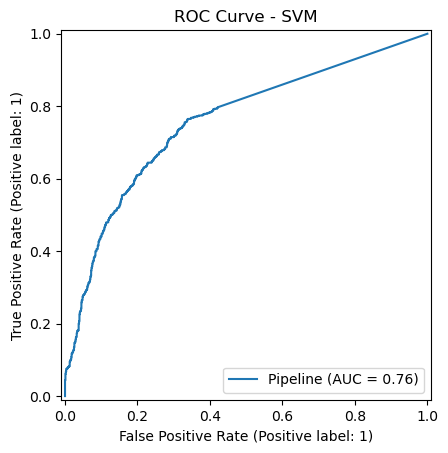

In [77]:
plot_roc_curve(best_svm_model, X_test, y_test, 'SVM')
